# Perceptron

It is an algorithm like linear regression, logistic, and more.

Design
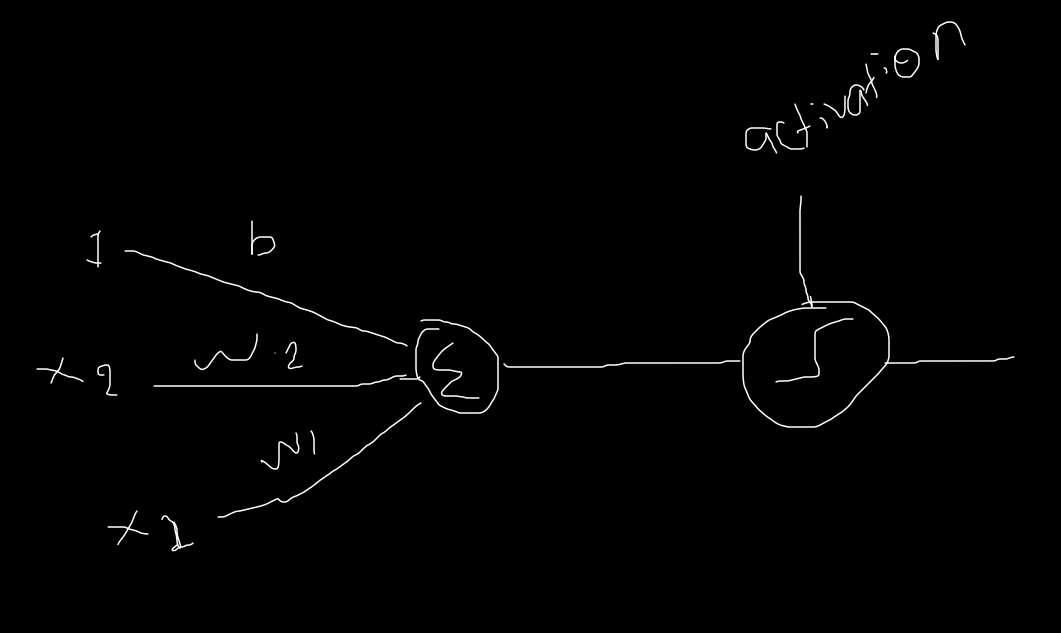
- Mathematical Model
- **z=E=w1*x1+w2*x2+b**
The main idea to calculate the value of w1 and w2 by using perception after traiinng


## Neuron vs Perceptron
- Perceptroon take an inspirational fro human brain or neurin


## Geometric Intution
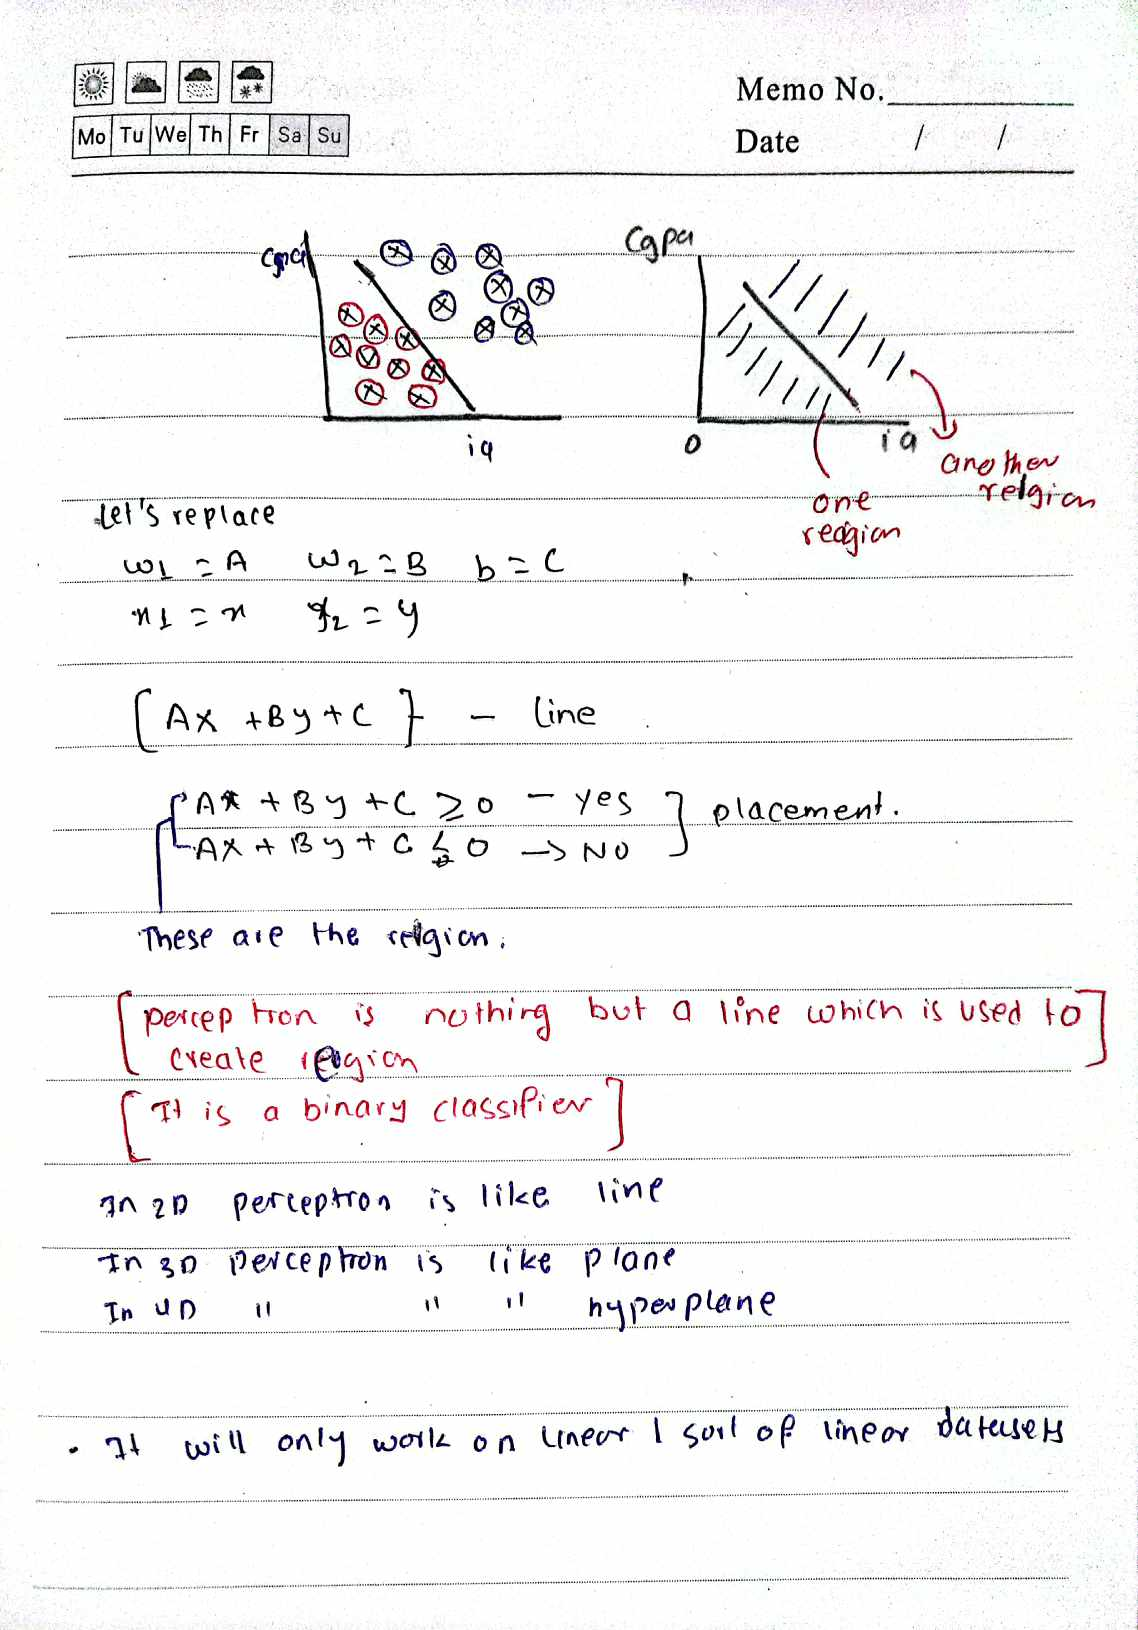

## Let's do it using real datasets.

In [148]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [88]:
dataset=pd.read_csv('datasets/student_marks.csv')

In [89]:
dataset.head(10)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
5,6,3.211,17.822
6,3,6.063,29.889
7,5,3.413,17.264
8,4,4.410,20.348
9,3,6.173,30.862


In [90]:
dataset.shape

(100, 3)

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [106]:

dataset['pass'] = np.where(dataset['Marks'] > 20, 1, 0)


In [107]:
x1 = dataset.iloc[:, 1]
x2=dataset.iloc[:,2]
y=dataset.iloc[:,3]

<Axes: xlabel='time_study', ylabel='Marks'>

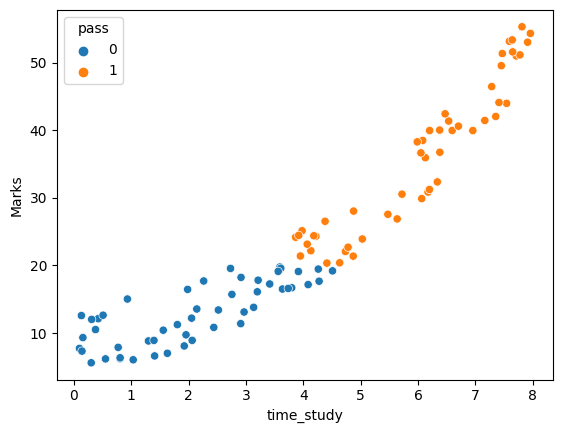

In [108]:
sns.scatterplot(x=x1,y=x2,hue=y)

In [110]:
X_train = pd.concat([x1, x2], axis=1)  # concat x1 and x2 into X_train
y_train = y  # Assign y to y_train


In [125]:
perceptron=Perceptron()
perceptron.fit(X_train,y_train)

Perceptron()

In [126]:
pred_=perceptron.predict(X_train)

In [127]:
perceptron.coef_,perceptron.intercept_

(array([[-10.498,   6.223]]), array([-143.]))

/home/ishwor/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

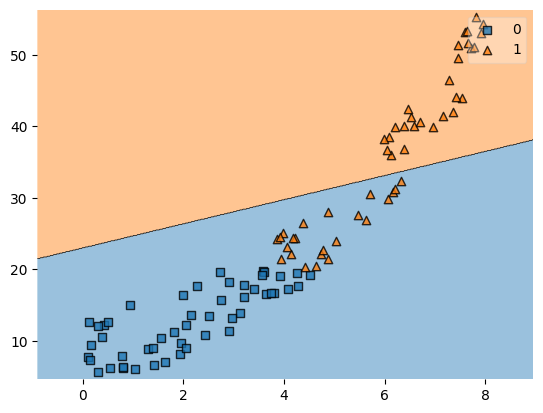

In [128]:
plot_decision_regions(X_train.values,y_train.values,clf=perceptron)

In [140]:
conf_matrix=confusion_matrix(y_train,pred_)
print(conf_matrix
     )

[[50  0]
 [23 27]]


In [149]:
accuracy_score(y_train,pred_)

0.77

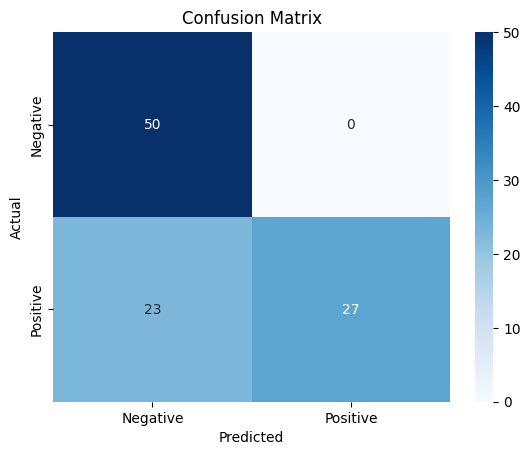

In [146]:
labels = ['Negative', 'Positive']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [138]:
TP, TN, FP, FN = conf_matrix[1, 1], conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0]
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)


In [139]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.77
Precision: 1.0
Recall: 0.54
